# Setup phase

In [3]:
%pip install scipy
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scipy
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# preprocessing of the data

## Loading the data

In [6]:
import numpy as np
import pandas as pd

dataframe = pd.read_csv('anonymized-surveys-numbers.csv')
dataframe.head()

,Id,starting_time,ending_time,language,compilationLanguage,everHeardAboutTarots,tarotKnowledge,tarotUsageFrequency,tarotUseCases,tarotUsageTarget,...,LLM_everGivenUsefulInfoAsDecisionSupport,LLM_decisionSupportTarget,LLM_everChangedDecisionAsDecisionSupport,LLM_trustMore,gender,education,nazionalità,statoDiResidenza,cittaDiResidenza,birthdate
0,1,7/28/2024 11:10,7/28/2024 11:12,Italiano,Italiano,Si,4,2,Per divertimento e passare tempo con gli amici;,"Li utilizzo per gli altri, li leggo io",...,2.0,Decisioni di studio/educazione;Decisioni lavor...,Si,Del tuo intuito,Maschile,Laurea magistrale,Italiana,Italia,Caltanissetta,1998.0
1,2,7/29/2024 11:10,7/29/2024 11:12,Italiano,Italiano,Si,3,2,Per divertimento e passare tempo con gli amici;,"Li utilizzo per gli altri, li leggo io",...,2.0,Decisioni di studio/educazione;Decisioni lavor...,Si,Del tuo intuito,Femminile,Master II livello,Italiana,Italia,Catania,1998.0
2,3,7/29/2024 11:10,7/29/2024 11:14,Italiano,Italiano,Si,2,2,Per comprendere meglio cio che accade nella mi...,"Li utilizzo per me stesso, li leggo io",...,0.0,Non chiedo consiglio per prendere decisioni;,No,Del tuo intuito,Femminile,Laurea magistrale,Italiana,Italia,Roma,1999.0
3,4,7/29/2024 11:18,7/29/2024 11:23,Italiano,Italiano,Si,1,1,Per divertimento e passare tempo con gli amici;,"Li utilizzo per me stesso, me li faccio legger...",...,2.0,Decisioni di studio/educazione;Decisioni lavor...,No,Del tuo intuito,Maschile,Laurea magistrale,Italiana,Italia,Mascalucia,1996.0
4,5,7/29/2024 11:27,7/29/2024 11:32,English (United Kingdom)?,Italiano,Si,1,0,Per divertimento e passare tempo con gli amici;,"Li utilizzo per me stesso, li leggo io",...,1.0,Decisioni di studio/educazione;,No,Del tuo intuito,Maschile,Master I livello,Italiana,Italia,Aci Catena,1996.0


In [7]:
dataframe.columns

Index(['Id', 'starting_time', 'ending_time', 'language', 'compilationLanguage',
       'everHeardAboutTarots', 'tarotKnowledge', 'tarotUsageFrequency',
       'tarotUseCases', 'tarotUsageTarget', 'tarotUtility', 'tarotTrust',
       'tarotFuturePredictionTrust', 'tarotDecisionSupport',
       'tarotDecisionSupportFrequency', 'tarotSubjects', 'tarotInfluence',
       'tarotDecisionSupportTrust', 'tarotModifyDecision',
       'tarotImportanceOverOtherSources', 'tarotContradictionFrequency',
       'tarotTrustMore', 'randomNumber', 'LLM_knowledge',
       'LLM_knowledgeQuantified', 'LLM_use', 'LLM_usageFrequency',
       'LLM_usageTarget', 'LLM_utility', 'LLM_trust',
       'LLM_trustAgainstClassicalInfo', 'LLM_asDecisionSupport',
       'LLM_decisionSupportUsageFrequency',
       'LLM_everGivenUsefulInfoAsDecisionSupport', 'LLM_decisionSupportTarget',
       'LLM_everChangedDecisionAsDecisionSupport', 'LLM_trustMore', 'gender',
       'education', 'nazionalità', 'statoDiResidenza', 'citt

In [8]:
relevant_data = dataframe.drop(columns=['Id','starting_time','ending_time','language','randomNumber'])

real_data = relevant_data

# convert the columns with "Si" or "No" to 1 or 0
real_data = real_data.replace('Si', 1)
real_data = real_data.replace('No', 0)

real_data = real_data.replace('Del tuo intuito' , -1)
real_data = real_data.replace('Dei tarocchi' , 1)

# convert the rows with Na to 0
real_data = real_data.fillna(0)

real_data['age'] = real_data['birthdate'].apply(lambda x: 2024 - x)

# drop the columns that have strings
real_data = real_data.drop(columns=['everHeardAboutTarots','compilationLanguage', 'tarotTrustMore','tarotUsageTarget', 'tarotUseCases', 'tarotSubjects', 'LLM_trustMore', 'LLM_usageTarget', 'LLM_decisionSupportTarget', 'gender', 'education', 'nazionalità', 'statoDiResidenza','cittaDiResidenza','birthdate'])

/tmp/ipykernel_34558/2816845446.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  real_data = real_data.replace('Si', 1)
/tmp/ipykernel_34558/2816845446.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  real_data = real_data.replace('No', 0)
/tmp/ipykernel_34558/2816845446.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [9]:
real_data['age']

0     26.0
1     26.0
2     25.0
3     28.0
4     28.0
5     32.0
6     30.0
7     22.0
8     27.0
9     29.0
10    26.0
11    47.0
12    28.0
13    28.0
14    30.0
15    27.0
16    28.0
17    28.0
18    28.0
19    67.0
20    28.0
21    33.0
22    33.0
23    28.0
24    28.0
25    21.0
26    30.0
27    27.0
28    31.0
29    31.0
Name: age, dtype: float64

## Key Research Questions and Hypotheses
Is there a relationship between belief and trust in tarot and belief and trust in LLM?
The hypothesis to negate or confirm are:
- Null hypothesis(H0): There is no relationship between belief and trust in tarot and belief and trust in LLM.
- Alternative Hypothesis (H1): There is a significant relationship between belief in tarot and belief in AI LLMs.

### 3. **Correlation and Association Tests:**

In [10]:
# spearman correlation matrix
correlation_matrix_spearman = real_data.corr(method='spearman')
# pearson correlation matrix
correlation_matrix_pearson = real_data.corr(method='pearson')


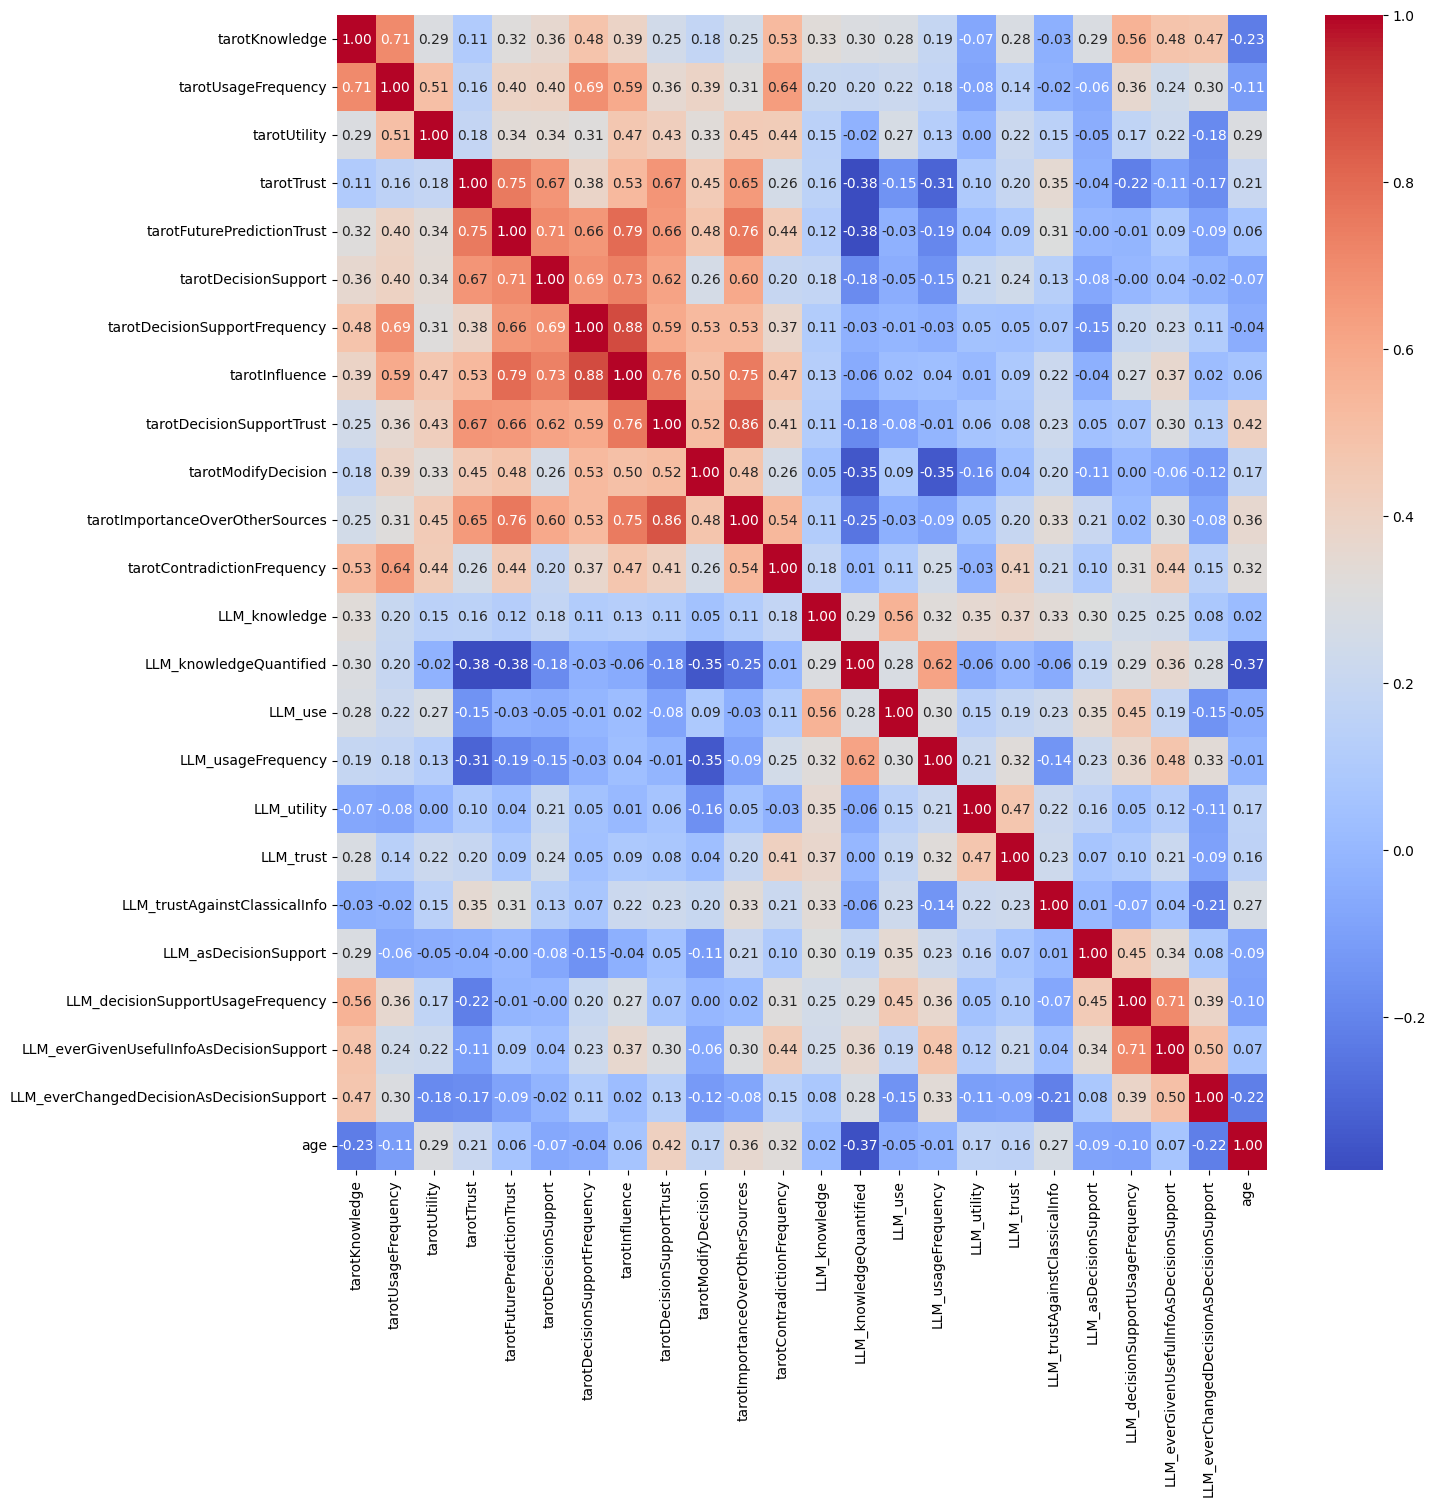

In [11]:
# show correlation matrices in heatmaps
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_spearman, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

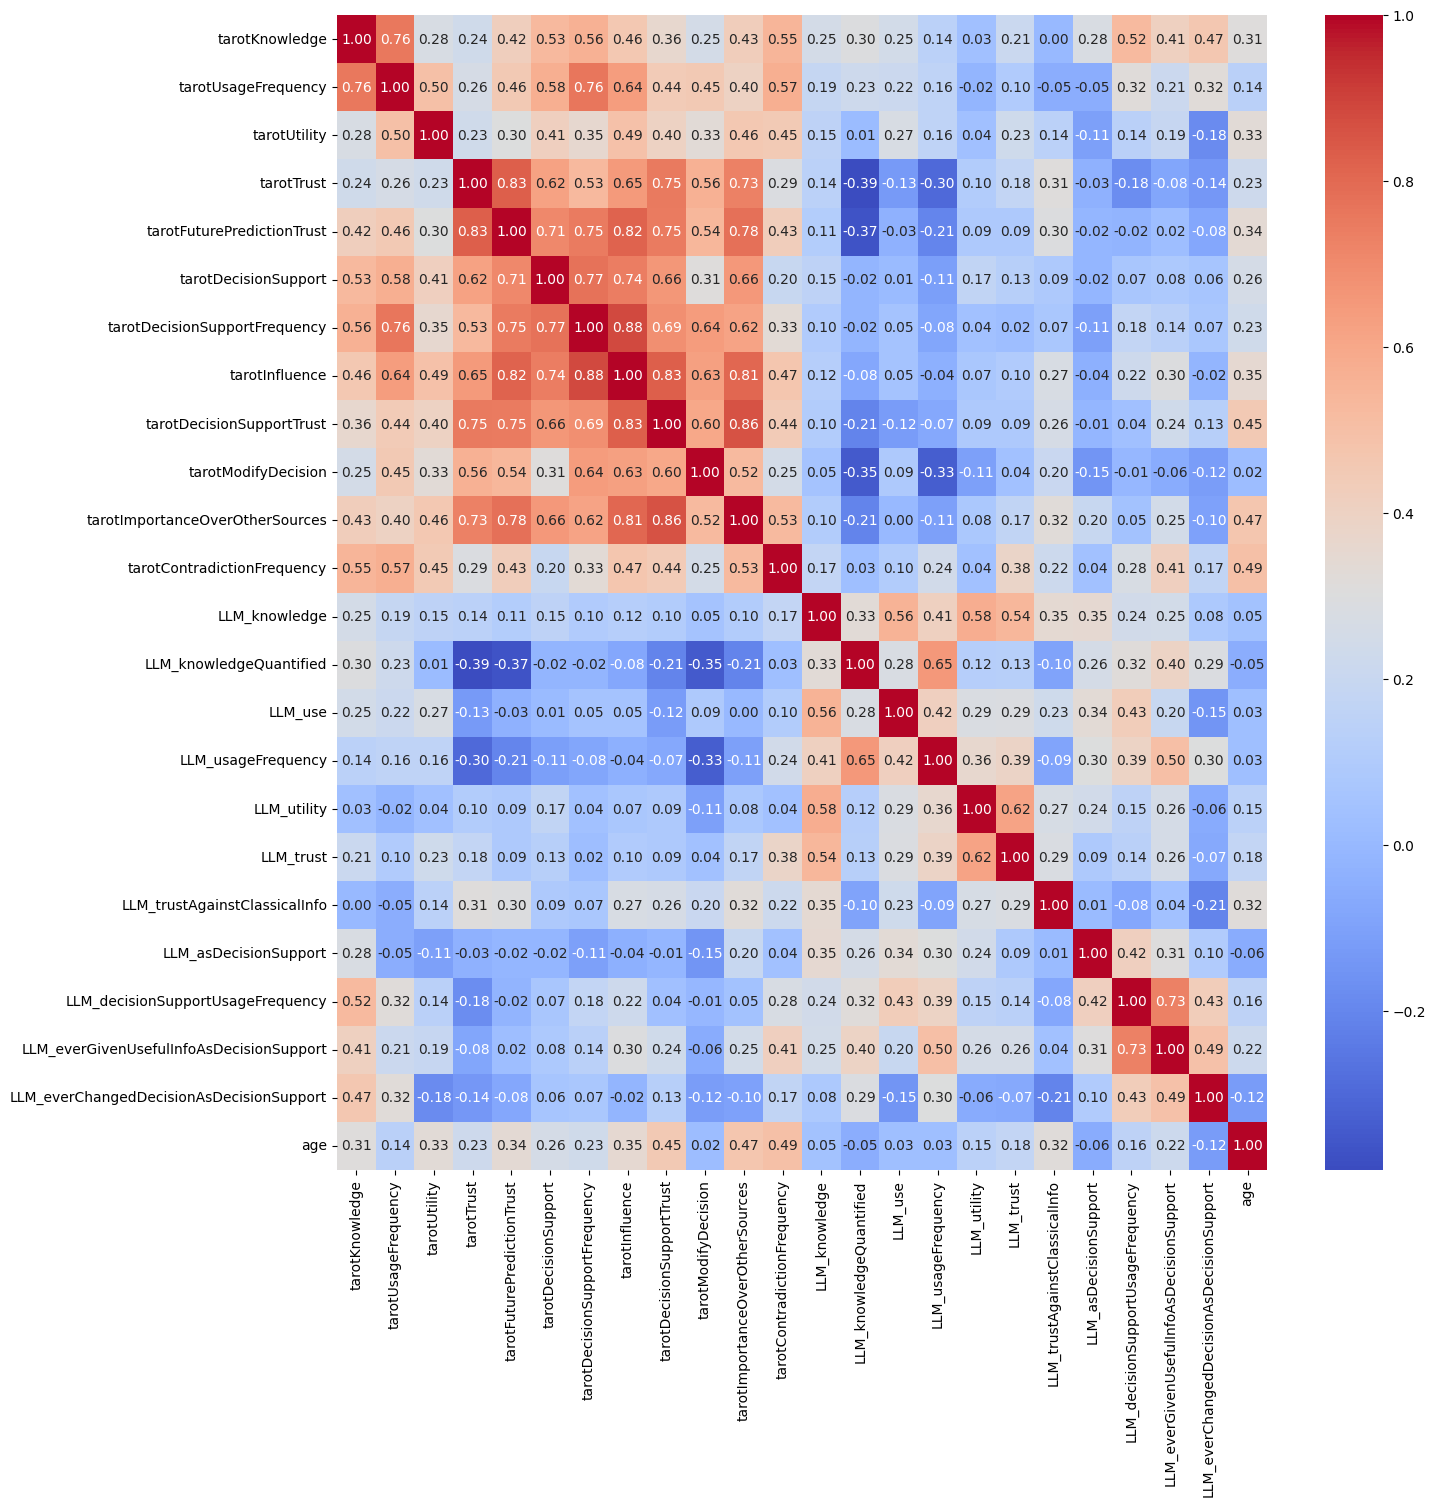

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_pearson, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**Chi-Square Test for Independence:**
   

In [13]:
# chi-square test for indipendence
from scipy import stats

crosstab_usageFrequency_vs_decisionSupportUsageFrequency = pd.crosstab(real_data['LLM_usageFrequency'],real_data['LLM_decisionSupportUsageFrequency'])
stats.chi2_contingency(crosstab_usageFrequency_vs_decisionSupportUsageFrequency)

Chi2ContingencyResult(statistic=np.float64(10.630102040816327), pvalue=np.float64(0.560856321955135), dof=12, expected_freq=array([[0.53333333, 0.93333333, 0.46666667, 0.06666667],
       [1.33333333, 2.33333333, 1.16666667, 0.16666667],
       [1.86666667, 3.26666667, 1.63333333, 0.23333333],
       [3.73333333, 6.53333333, 3.26666667, 0.46666667],
       [0.53333333, 0.93333333, 0.46666667, 0.06666667]]))

For p-value < 0.05, we reject the null hypothesis and conclude that there is a significant relationship between belief in tarot and belief in AI LLMs.

### 4. **Cluster Analysis:**
   Cluster analysis to group respondents into different profiles based on their attitudes toward tarot and AI LLMs. For example:
   - **Cluster 1:** High belief in tarot, low belief in AI LLMs.
   - **Cluster 2:** High belief in both tarot and AI LLMs.
   - **Cluster 3:** Low belief in both tarot and AI LLMs.


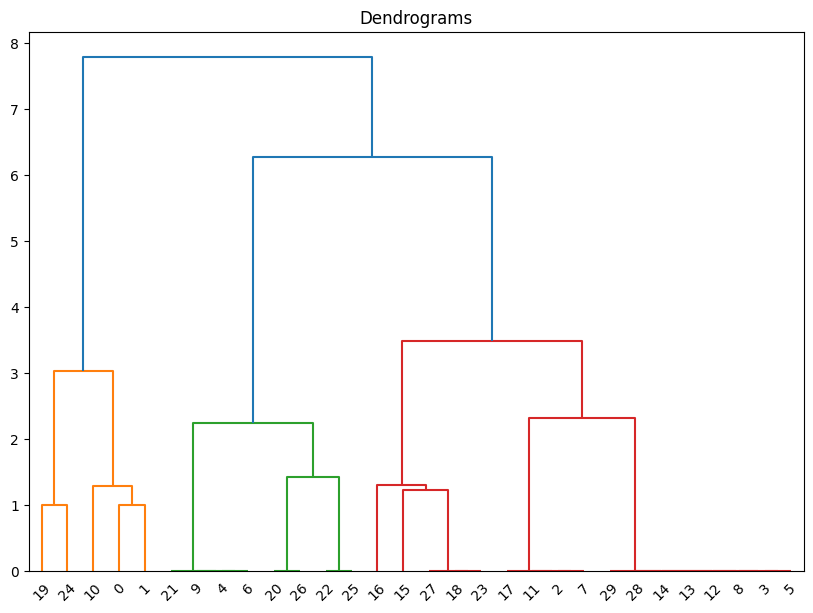

In [14]:
# cluster analysis with different features
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

real_data_subset = real_data[['LLM_knowledgeQuantified' , 'tarotKnowledge']]
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(real_data_subset, method='ward'))

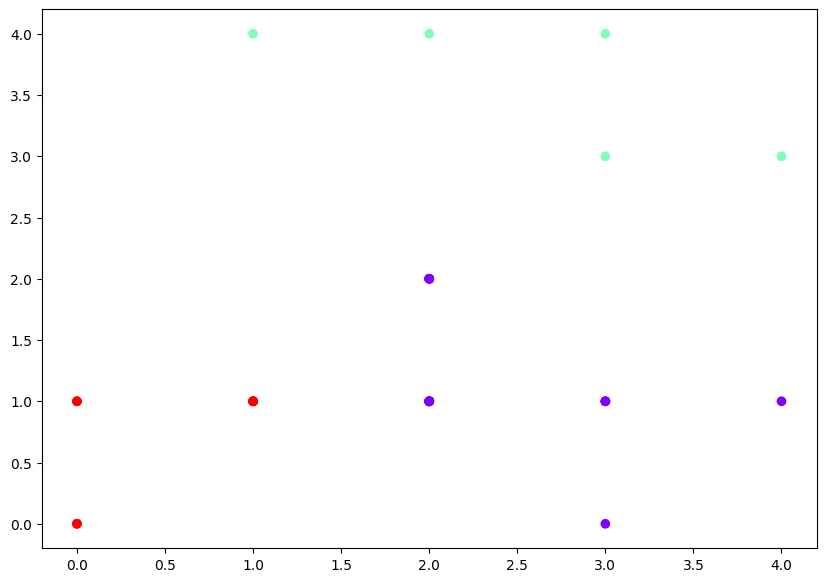

In [15]:
# plot 2d data with colors based on the cluster
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(real_data_subset)

plt.figure(figsize=(10, 7))
plt.scatter(real_data_subset['LLM_knowledgeQuantified'], real_data_subset['tarotKnowledge'], c=cluster.labels_, cmap='rainbow')


### 5. **Factor Analysis:**
Factor analysis can help identify latent variables. I am searching for latent dimensions such as "belief in divination" or "reliance on external tools for decision-making" that could correlate with attitudes toward AI LLMs.

In [16]:
belief_in_divination = (real_data['tarotTrust'] + real_data['tarotDecisionSupportTrust'] + real_data['tarotModifyDecision']) / 3
reliance_on_external_tools = (real_data['LLM_trust'] + real_data['LLM_asDecisionSupport'] + real_data['LLM_trustAgainstClassicalInfo']) / 3

In [17]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=3)
fa.fit(real_data)
real_data_transformed = fa.transform(real_data)


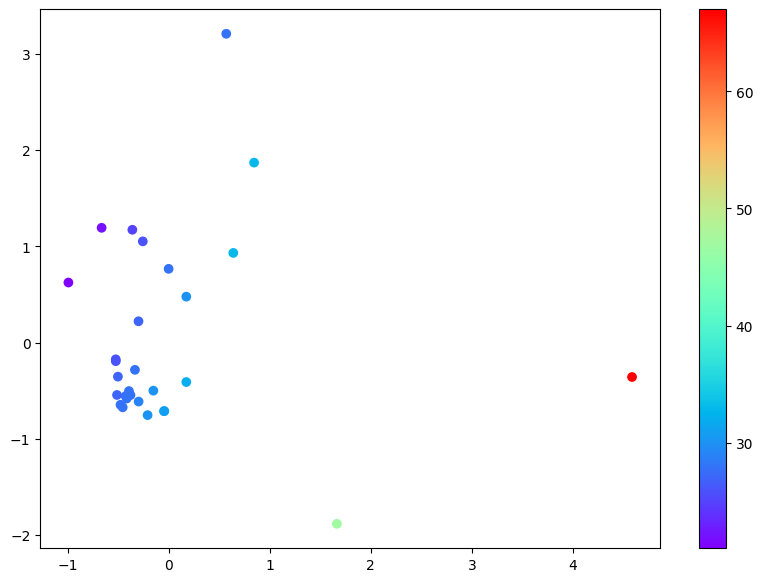

In [18]:

plt.figure(figsize=(10, 7))
sc = plt.scatter(real_data_transformed[:,0], real_data_transformed[:,1], c=real_data['age'], cmap='rainbow')
plt.colorbar(sc)


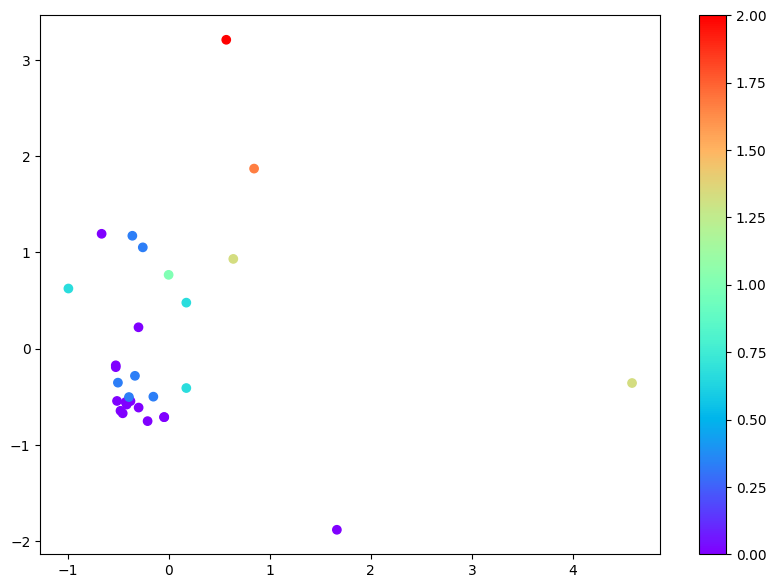

In [19]:

plt.figure(figsize=(10, 7))
sc = plt.scatter(real_data_transformed[:,0], real_data_transformed[:,1], c=belief_in_divination, cmap='rainbow')
plt.colorbar(sc)

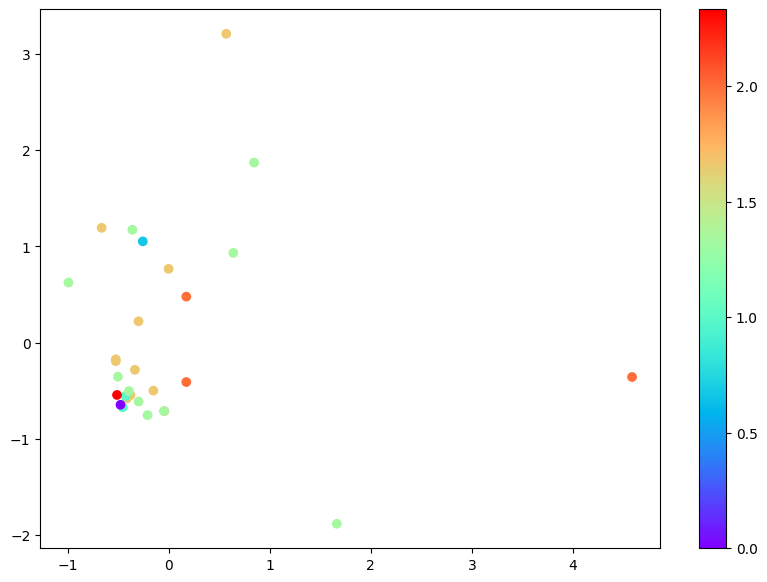

In [20]:
plt.figure(figsize=(10, 7))
sc = plt.scatter(real_data_transformed[:,0], real_data_transformed[:,1], c=reliance_on_external_tools, cmap='rainbow')
plt.colorbar(sc)

plt.show()

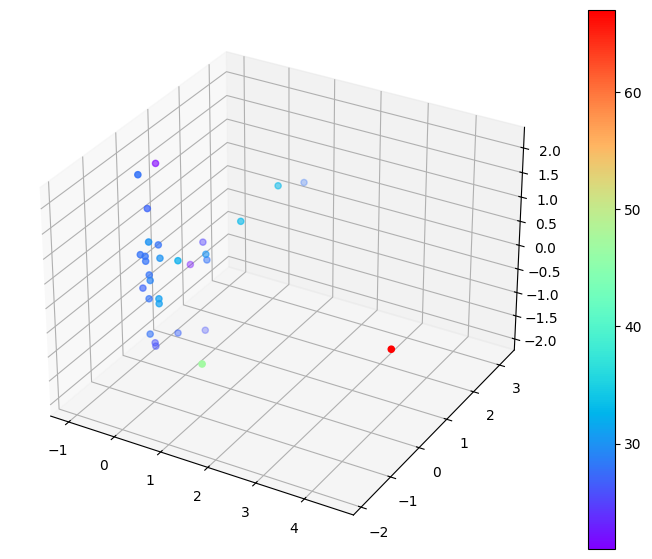

In [21]:
# plot 3d data with colors based on the age
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(real_data_transformed[:,0], real_data_transformed[:,1], real_data_transformed[:,2], c=real_data['age'], cmap='rainbow')
# legend with the color bar
plt.colorbar(sc)

plt.show()

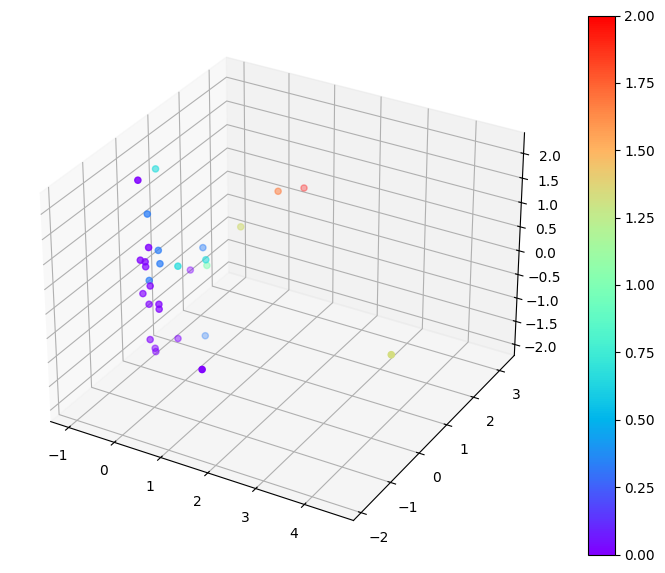

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(real_data_transformed[:,0], real_data_transformed[:,1], real_data_transformed[:,2], c=belief_in_divination, cmap='rainbow')
plt.colorbar(sc)

plt.show()

Plot shows that almost all of the people have low belief in divination and will be clustered in the same group. while the people that have a strong belief in divination will be more of outliers.

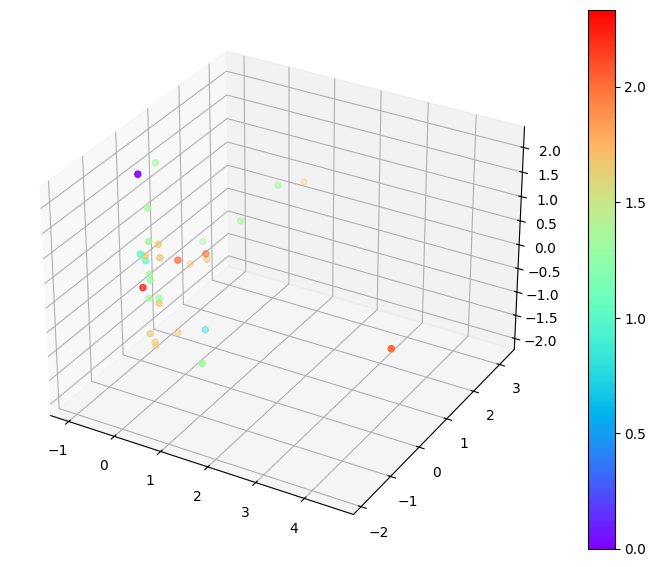

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(real_data_transformed[:,0], real_data_transformed[:,1], real_data_transformed[:,2], c=reliance_on_external_tools, cmap='rainbow')
plt.colorbar(sc)

plt.show()

/home/josura/Projects/tarots/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


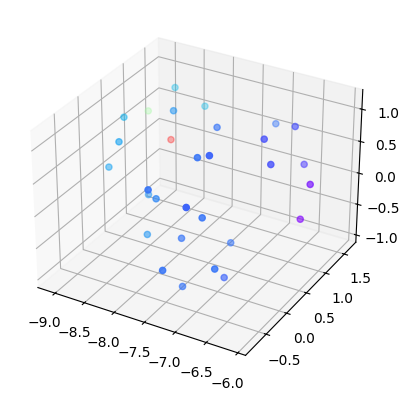

In [24]:
# UMAP
import umap

reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(real_data)

#plot 3d data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:,0], embedding[:,1], embedding[:,2], c=real_data['age'], cmap='rainbow')

plt.show()

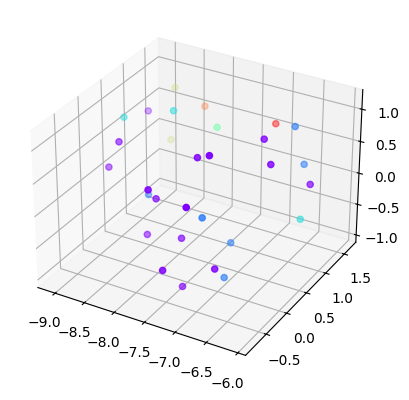

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:,0], embedding[:,1], embedding[:,2], c=belief_in_divination, cmap='rainbow')

plt.show()

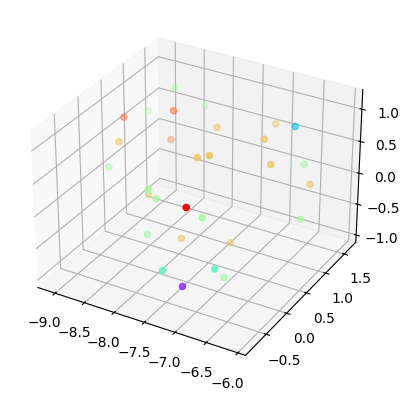

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:,0], embedding[:,1], embedding[:,2], c=reliance_on_external_tools, cmap='rainbow')

plt.show()

# 6. Regression Analysis:

In [27]:
# linear regressiion to predict the LLM_trust
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = real_data.drop(columns=['LLM_trust'])
y = real_data['LLM_trust']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mean_squared_error(y_test, y_pred)

np.float64(6.98957416241815)

In [28]:
# use statsmodels to get the p-values
import statsmodels.api as sm

X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LLM_trust   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     2.097
Date:                Wed, 25 Sep 2024   Prob (F-statistic):              0.182
Time:                        08:45:46   Log-Likelihood:                 3.3458
No. Observations:                  30   AIC:                             41.31
Df Residuals:                       6   BIC:                             74.94
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.3264      1.048      0.311      0.766      -2.239       2.892
tarotKnowledge                               0.9323      0.384      2.430      0.051      -0.007       1.871
tarotUsageFrequency                         -1.5752      0.746     -2.112      0.079      -3.400       0.250
tarotUtility                                 0.5317      0.546      0.973      0.368      -0.805       1.869
tarotTrust                                   0.7742      0.470      1.647      0.151      -0.376       1.924
tarotFuturePredictionTrust                  -1.5899      0.679     -2.342      0.058      -3.251       0.071
tarotDecisionSupport                        -0.1989      0.347     -0.573      0.587      -1.048       0.650
tarotDecisionSupportFrequency                0.5984      0.656      0.912      0.397      -1.008       2.205
tarotInfluence                               2.6539      1.644      1.614      0.158      -1.370       6.678
tarotDecisionSupportTrust                   -1.4444      0.995     -1.452      0.197      -3.878       0.989
tarotModifyDecision                         -0.5739      1.395     -0.412      0.695      -3.986       2.839
tarotImportanceOverOtherSources              0.2950      0.648      0.455      0.665      -1.291       1.881
tarotContradictionFrequency                  0.4987      0.255      1.958      0.098      -0.124       1.122
LLM_knowledge                                0.6316      0.933      0.677      0.524      -1.651       2.914
LLM_knowledgeQuantified                     -0.4154      0.238     -1.742      0.132      -0.999       0.168
LLM_use                                      0.6221      1.018      0.611      0.563      -1.868       3.112
LLM_usageFrequency                           0.3660      0.237      1.544      0.174      -0.214       0.946
LLM_utility                                  0.6263      0.283      2.215      0.069      -0.065       1.318
LLM_trustAgainstClassicalInfo               -0.2746      0.364     -0.755      0.479      -1.164       0.615
LLM_asDecisionSupport                       -0.1990      0.274     -0.727      0.495      -0.869       0.471
LLM_decisionSupportUsageFrequency           -0.6019      0.513     -1.172      0.286      -1.858       0.654
LLM_everGivenUsefulInfoAsDecisionSupport    -0.5911      0.411     -1.439      0.200      -1.596       0.414
LLM_everChangedDecisionAsDecisionSupport     1.4387      1.614      0.892      0.407      -2.510       5.387
age                                         -0.0117      0.033     -0.351      0.738      -0.093       0.070
==============================================================================
Omnibus:                        1.307   Durbin-Watson:       

In [29]:
# linear regression to predict the tarotTrust
X = real_data.drop(columns=['tarotTrust'])
y = real_data['tarotTrust']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mean_squared_error(y_test, y_pred)

np.float64(2.2444299254876334)

In [30]:
# use statsmodels to get the p-values
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tarotTrust   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     7.836
Date:                Wed, 25 Sep 2024   Prob (F-statistic):            0.00839
Time:                        08:45:46   Log-Likelihood:                 13.164
No. Observations:                  30   AIC:                             21.67
Df Residuals:                       6   BIC:                             55.30
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.3992      0.744      0.536      0.611      -1.422       2.220
tarotKnowledge                              -0.5407      0.321     -1.684      0.143      -1.326       0.245
tarotUsageFrequency                          1.3444      0.450      2.985      0.024       0.242       2.446
tarotUtility                                -0.7305      0.301     -2.425      0.051      -1.467       0.007
tarotFuturePredictionTrust                   1.4725      0.311      4.728      0.003       0.711       2.235
tarotDecisionSupport                         0.4058      0.196      2.067      0.084      -0.075       0.886
tarotDecisionSupportFrequency               -0.8245      0.376     -2.190      0.071      -1.745       0.097
tarotInfluence                              -2.8040      0.840     -3.340      0.016      -4.858      -0.750
tarotDecisionSupportTrust                    1.6561      0.488      3.397      0.015       0.463       2.849
tarotModifyDecision                          1.1628      0.902      1.289      0.245      -1.045       3.370
tarotImportanceOverOtherSources             -0.2412      0.465     -0.519      0.623      -1.379       0.897
tarotContradictionFrequency                 -0.3361      0.191     -1.762      0.129      -0.803       0.131
LLM_knowledge                                0.2772      0.689      0.403      0.701      -1.407       1.962
LLM_knowledgeQuantified                      0.2675      0.180      1.482      0.189      -0.174       0.709
LLM_use                                     -1.2842      0.545     -2.357      0.056      -2.617       0.049
LLM_usageFrequency                          -0.0560      0.201     -0.279      0.790      -0.547       0.435
LLM_utility                                 -0.4708      0.196     -2.398      0.053      -0.951       0.010
LLM_trust                                    0.4023      0.244      1.647      0.151      -0.195       1.000
LLM_trustAgainstClassicalInfo                0.4225      0.213      1.981      0.095      -0.099       0.944
LLM_asDecisionSupport                       -0.0870      0.203     -0.429      0.683      -0.583       0.409
LLM_decisionSupportUsageFrequency            0.7445      0.276      2.701      0.036       0.070       1.419
LLM_everGivenUsefulInfoAsDecisionSupport     0.5640      0.255      2.214      0.069      -0.059       1.187
LLM_everChangedDecisionAsDecisionSupport    -2.3819      0.766     -3.109      0.021      -4.256      -0.508
age                                         -0.0143      0.023     -0.607      0.566      -0.072       0.043
==============================================================================
Omnibus:                        1.816   Durbin-Watson:       

# 7. Cross-Tabulations and comparison between age and gender groups:

In [31]:
# add age_group column
real_data['age_group'] = pd.cut(real_data['age'], bins=[20, 25, 30, 50, 100], labels=['20-25', '25-30', '30-50', '50-100'])
dataframe['age_group'] = pd.cut(real_data['age'], bins=[20, 25, 30, 50, 100], labels=['20-25', '25-30', '30-50', '50-100'])

real_data['age_group']

0      25-30
1      25-30
2      20-25
3      25-30
4      25-30
5      30-50
6      25-30
7      20-25
8      25-30
9      25-30
10     25-30
11     30-50
12     25-30
13     25-30
14     25-30
15     25-30
16     25-30
17     25-30
18     25-30
19    50-100
20     25-30
21     30-50
22     30-50
23     25-30
24     25-30
25     20-25
26     25-30
27     25-30
28     30-50
29     30-50
Name: age_group, dtype: category
Categories (4, object): ['20-25' < '25-30' < '30-50' < '50-100']

# Comparing means across groups (T-tests and ANOVA):

In [32]:
from scipy.stats import ttest_ind, f_oneway
# Gender comparison for tarotTrust
male_trust = dataframe[dataframe['gender'] == 'Maschile']['tarotTrust']
female_trust = dataframe[dataframe['gender'] == 'Femminile']['tarotTrust']
ttest_ind(male_trust, female_trust)

TtestResult(statistic=np.float64(-1.3785253809464741), pvalue=np.float64(0.17978805487312316), df=np.float64(26.0))

In [33]:
# Age group comparison for tarotTrust
age_group_20_25_trust = real_data[real_data['age_group'] == '20-25']['tarotTrust']
age_group_25_30_trust = real_data[real_data['age_group'] == '25-30']['tarotTrust']
age_group_30_50_trust = real_data[real_data['age_group'] == '30-50']['tarotTrust']
age_group_50_100_trust = real_data[real_data['age_group'] == '50-100']['tarotTrust']

f_oneway(age_group_20_25_trust, age_group_25_30_trust, age_group_30_50_trust, age_group_50_100_trust)

F_onewayResult(statistic=np.float64(1.2380952380952386), pvalue=np.float64(0.31602181883880504))

In [34]:
# gender comparison for LLM_trust
male_trust = dataframe[dataframe['gender'] == 'Maschile']['LLM_trust']
female_trust = dataframe[dataframe['gender'] == 'Femminile']['LLM_trust']
ttest_ind(male_trust, female_trust)

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(26.0))

In [35]:
# Age group comparison for LLM_trust
age_group_20_25_trust = real_data[real_data['age_group'] == '20-25']['LLM_trust']
age_group_25_30_trust = real_data[real_data['age_group'] == '25-30']['LLM_trust']
age_group_30_50_trust = real_data[real_data['age_group'] == '30-50']['LLM_trust']
age_group_50_100_trust = real_data[real_data['age_group'] == '50-100']['LLM_trust']

f_oneway(age_group_20_25_trust, age_group_25_30_trust, age_group_30_50_trust, age_group_50_100_trust)

F_onewayResult(statistic=np.float64(1.264160401002506), pvalue=np.float64(0.30722416516498874))

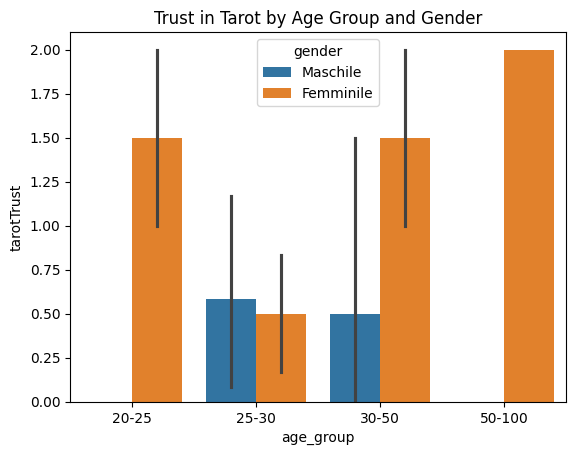

In [36]:
dataframe_filtered = dataframe[dataframe['gender'].isin(['Maschile', 'Femminile'])]
sns.barplot(dataframe_filtered, x='age_group', y='tarotTrust', hue='gender')
plt.title('Trust in Tarot by Age Group and Gender')
plt.show()

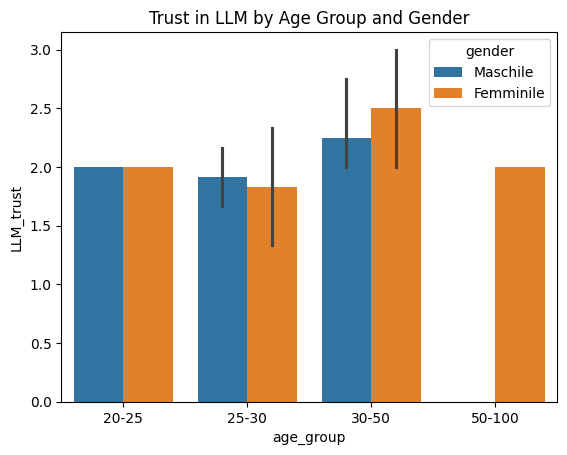

In [37]:
sns.barplot(dataframe_filtered, x='age_group', y='LLM_trust', hue='gender')
plt.title('Trust in LLM by Age Group and Gender')
plt.show()

In [41]:
# interaction effects
import statsmodels.formula.api as smf

model = smf.ols(formula='tarotTrust ~ C(age_group) * C(gender)', data=dataframe).fit()
model.summary()

/home/josura/Projects/tarots/venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tarotTrust   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.058
Date:                Wed, 25 Sep 2024   Prob (F-statistic):              0.423
Time:                        09:53:25   Log-Likelihood:                -32.899
No. Observations:                  29   AIC:                             81.80
Df Residuals:                      21   BIC:                             92.74
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         0.3194      0.575      0.555      0.585      -0.877       1.516
C(age_group)[T.25-30]                            -0.3194      0.575     -0.555      0.585      -1.516       0.877
C(age_group)[T.30-50]                             0.1667      0.442      0.377      0.710      -0.753       1.086
C(age_group)[T.50-100]                            0.2500      0.541      0.462      0.649      -0.876       1.376
C(gender)[T.Femminile]                            1.1806      0.679      1.738      0.097      -0.232       2.593
C(gender)[T.Maschile]                            -0.3194      0.769     -0.415      0.682      -1.919       1.280
C(age_group)[T.25-30]:C(gender)[T.Femminile]     -0.6806      0.740     -0.919      0.368      -2.220       0.859
C(age_group)[T.30-50]:C(gender)[T.Femminile]     -0.1667      0.675     -0.247      0.807      -1.571       1.238
C(age_group)[T.50-100]:C(gender)[T.Femminile]     0.2500      0.541      0.462      0.649      -0.876       1.376
C(age_group)[T.25-30]:C(gender)[T.Maschile]       0.9028      0.797      1.133      0.270      -0.755       2.560
C(age_group)[T.30-50]:C(gender)[T.Maschile]       0.3333      0.722      0.462      0.649      -1.168       1.835
C(age_group)[T.50-100]:C(gender)[T.Maschile]           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       14.735   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.959
Skew:                           1.499   Prob(JB):                     0.000565
Kurtosis:                       4.842   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
model = smf.ols(formula='LLM_trust ~ C(age_group) * C(gender)', data=dataframe).fit()
model.summary()

/home/josura/Projects/tarots/venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LLM_trust   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.8424
Date:                Wed, 25 Sep 2024   Prob (F-statistic):              0.565
Time:                        09:55:10   Log-Likelihood:                -20.539
No. Observations:                  29   AIC:                             57.08
Df Residuals:                      21   BIC:                             68.02
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         1.2083      0.376      3.216      0.004       0.427       1.990
C(age_group)[T.25-30]                            -0.2083      0.376     -0.554      0.585      -0.990       0.573
C(age_group)[T.30-50]                             0.2500      0.289      0.866      0.396      -0.350       0.850
C(age_group)[T.50-100]                        -1.592e-16      0.354   -4.5e-16      1.000      -0.735       0.735
C(gender)[T.Femminile]                            0.7917      0.444      1.785      0.089      -0.131       1.714
C(gender)[T.Maschile]                             0.7917      0.502      1.576      0.130      -0.253       1.836
C(age_group)[T.25-30]:C(gender)[T.Femminile]      0.0417      0.484      0.086      0.932      -0.964       1.047
C(age_group)[T.30-50]:C(gender)[T.Femminile]      0.2500      0.441      0.567      0.577      -0.667       1.167
C(age_group)[T.50-100]:C(gender)[T.Femminile] -1.874e-16      0.354   -5.3e-16      1.000      -0.735       0.735
C(age_group)[T.25-30]:C(gender)[T.Maschile]       0.1250      0.520      0.240      0.813      -0.957       1.207
C(age_group)[T.30-50]:C(gender)[T.Maschile]   -7.216e-16      0.471  -1.53e-15      1.000      -0.980       0.980
C(age_group)[T.50-100]:C(gender)[T.Maschile]           0          0        nan        nan           0           0
==============================================================================
Omnibus:                        1.591   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                0.544
Skew:                           0.162   Prob(JB):                        0.762
Kurtosis:                       3.588   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""